<a href="https://colab.research.google.com/github/rzagni/Fintech/blob/main/technical_analysis_sp500_ZagniA01795457.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**<font color="green">Fintech and Digital Innovation in Finance**
###**<font color="green">Course project part 2 | Text embeddings and Technical Analysis on S&P 500 data**
###**<font color="green">Section B data**
###**Renzo Zagni A01795457**</font>


# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [ ]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib


In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# Additionl libraries used
import seaborn as sns
import math

## Get the list of stocks in the S&P 500

In [ ]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [ ]:
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
ticker_list = df_tickers['Symbol'].tolist()

In [ ]:
#
# Addressing a known issue with dots in the ticker name
ticker_list = [ticker.replace('.', '-') for ticker in ticker_list]

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [ ]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [ ]:
df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
# Load closing prices
# Make sure you end this coding section by displaying your results: display(df_close)
display(df_close)

/tmp/ipython-input-10-2527597.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_close = yf.download(ticker_list, start=start_date, end=end_date)['Close']
[*********************100%***********************]  503 of 503 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,137.376266,168.283676,154.714767,156.160004,103.735443,91.096085,293.442108,469.390015,189.859940,55.668907,...,29.172792,91.453209,51.484390,111.217087,129.094406,66.839996,132.078354,118.202553,309.049988,156.223297
2024-05-02,136.217361,171.991287,153.844193,158.330002,103.374352,90.497009,295.092773,476.570007,192.405899,56.603554,...,29.955240,93.958221,51.493965,111.418373,134.052750,70.300003,131.824615,117.115036,312.709991,164.827896
2024-05-03,138.129074,182.279160,156.695114,159.710007,103.354828,89.774330,298.403870,486.179993,195.480621,56.431885,...,30.032518,95.378410,51.934326,111.188324,135.255371,69.470001,131.112137,120.278709,309.589996,164.670197
2024-05-06,139.278107,180.619171,155.681030,162.000000,103.101074,92.370285,300.712860,493.589996,199.093948,57.404686,...,30.022858,96.522438,52.039635,111.907227,137.217010,73.529999,132.907913,119.191193,315.790009,163.566269
2024-05-07,139.931839,181.305038,155.508835,159.809998,103.618340,93.387741,305.232483,492.269989,199.338745,58.739902,...,29.800682,95.891251,52.671455,111.351288,138.035187,71.599998,132.644409,120.051315,317.869995,166.030350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,106.795090,208.097107,178.825470,121.709999,128.801849,92.099998,291.410004,360.910004,194.345154,48.284031,...,25.294355,81.371361,69.709930,107.638626,115.241966,57.500000,146.859604,101.237473,244.080002,151.792435
2025-04-25,106.056648,209.005920,184.466751,122.510002,128.274216,90.680000,293.390015,367.720001,193.708054,47.759418,...,24.609919,81.900002,68.430580,107.579178,115.730400,58.090000,146.580978,101.247452,246.240005,152.958542
2025-04-28,106.645409,209.864792,190.692963,123.300003,128.951172,91.190002,293.250000,368.619995,192.841995,47.561451,...,25.363791,81.989769,69.005791,107.638626,115.550972,58.320000,147.028778,101.496803,243.490005,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [ ]:
def moving_averages(price_data, window):
    return price_data.rolling(window=window).mean()

In [ ]:
MA50 = moving_averages(df_close, 50)
MA200 = moving_averages(df_close, 200)

### Detecting Golden and Death Crosses in the last 14 days

In [ ]:
def detect_crosses(MA50, MA200, days=14):
    """
    Detects golden and death crosses for a set of stock tickers based on their
    50-day and 200-day moving averages.

    """

    golden_crosses = []
    death_crosses = []

    tickers = MA50.columns

    for ticker in tickers:
        ma50 = MA50[ticker].dropna()
        ma200 = MA200[ticker].dropna()

        if len(ma50) < days + 1 or len(ma200) < days + 1:
            continue

        ma50 = ma50[-(days + 1):]
        ma200 = ma200[-(days + 1):]
        ma50, ma200 = ma50.align(ma200, join='inner')

        for i in range(1, len(ma50)):
            prev_diff = ma50.iloc[i - 1] - ma200.iloc[i - 1]
            curr_diff = ma50.iloc[i] - ma200.iloc[i]

            if pd.isna(prev_diff) or pd.isna(curr_diff):
                continue

            if prev_diff < 0 and curr_diff > 0:
                golden_crosses.append((ticker, ma50.index[i].strftime("%Y-%m-%d")))
            elif prev_diff > 0 and curr_diff < 0:
                death_crosses.append((ticker, ma50.index[i].strftime("%Y-%m-%d")))

    golden_crosses = pd.DataFrame(golden_crosses, columns=['Ticker', 'Date'])
    death_crosses = pd.DataFrame(death_crosses, columns=['Ticker', 'Date'])

    return golden_crosses, death_crosses


In [ ]:
golden_crosses, death_crosses = detect_crosses(MA50, MA200, 14)

In [ ]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)
print("Golden Crosses last 14 days")
display(golden_crosses)

Golden Crosses last 14 days


,Ticker,Date
0,AMT,2025-04-21
1,CI,2025-04-30
2,EW,2025-04-17
3,INVH,2025-04-30
4,KDP,2025-04-21
5,MDLZ,2025-04-28
6,MOH,2025-04-28
7,NEM,2025-04-14
8,SBAC,2025-04-29
9,SJM,2025-04-25


In [ ]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)
print("Death Crosses last 14 days")
display(death_crosses)

Death Crosses last 14 days


,Ticker,Date
0,ACN,2025-04-10
1,ADSK,2025-04-11
2,AME,2025-04-22
3,AMP,2025-04-24
4,AMZN,2025-04-22
...,...,...
57,UNP,2025-04-16
58,VST,2025-04-30
59,WAB,2025-04-21
60,WAT,2025-04-28


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [ ]:
display(golden_crosses.sort_values(by="Ticker"))

,Ticker,Date
0,AMT,2025-04-21
1,CI,2025-04-30
2,EW,2025-04-17
3,INVH,2025-04-30
4,KDP,2025-04-21
5,MDLZ,2025-04-28
6,MOH,2025-04-28
7,NEM,2025-04-14
8,SBAC,2025-04-29
9,SJM,2025-04-25


#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [ ]:
display(death_crosses.sort_values("Date").head(10).sort_values(by="Ticker"))

,Ticker,Date
0,ACN,2025-04-10
1,ADSK,2025-04-11
19,DOV,2025-04-10
22,EOG,2025-04-10
23,EQIX,2025-04-14
26,GEN,2025-04-11
34,KMX,2025-04-11
41,NCLH,2025-04-10
52,SW,2025-04-11
54,TFC,2025-04-11


### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

In [ ]:
def get_top_crosses_by_volatility(close_prices, crosses_df):
    """
    Returns the top `n` tickers from crosses_df with the highest volatility.
    Volatility is calculated as the standard deviation of daily returns.
    """
    volatilities = []

    for idx, row in crosses_df.iterrows():
        ticker = row['Ticker']

        try:
            price_series = close_prices[ticker].dropna()
            returns = price_series.pct_change().dropna()
            volatility = returns.std()
            volatilities.append((ticker, row['Date'], volatility))
        except Exception as e:
            print(f"Could not compute volatility for {ticker}: {e}")

    df_vol = pd.DataFrame(volatilities, columns=["Ticker", "Date", "Volatility"])

    df_top = df_vol.sort_values(by="Volatility", ascending=False)

    return df_top


In [ ]:
top_golden_by_vol = get_top_crosses_by_volatility(df_close, golden_crosses)
top_death_by_vol = get_top_crosses_by_volatility(df_close, death_crosses)

print("Top Golden Crosses by Volatility")
display(top_golden_by_vol)
print("Top Death Crosses by Volatility")
display(top_death_by_vol)

Top Golden Crosses by Volatility


,Ticker,Date,Volatility
6,MOH,2025-04-28,0.028161
2,EW,2025-04-17,0.026160
7,NEM,2025-04-14,0.022835
0,AMT,2025-04-21,0.017251
1,CI,2025-04-30,0.016927
8,SBAC,2025-04-29,0.016839
9,SJM,2025-04-25,0.015457
3,INVH,2025-04-30,0.014076
5,MDLZ,2025-04-28,0.013202
4,KDP,2025-04-21,0.011858


Top Death Crosses by Volatility


,Ticker,Date,Volatility
58,VST,2025-04-30,0.047544
55,TSLA,2025-04-14,0.045489
11,CEG,2025-04-22,0.043657
41,NCLH,2025-04-10,0.032844
10,CCL,2025-04-22,0.031378
...,...,...,...
42,NWSA,2025-04-17,0.014981
16,D,2025-04-23,0.014717
57,UNP,2025-04-16,0.014413
49,SPGI,2025-04-22,0.013888


In [ ]:
def plot_crosses_grid(close_prices, crosses_df, title_prefix="Golden", n=10):
    """
    Plots top `n` tickers from crosses_df by volatility in a 1-column x N-rows,
    including MA50 and MA200 crosses. Results are sorted alphabetically by ticker.
    """
    sns.set_theme(style="whitegrid")

    volatilities = []
    for idx, row in crosses_df.iterrows():
        ticker = row['Ticker']
        try:
            price_series = close_prices[ticker].dropna()
            returns = price_series.pct_change().dropna()
            volatility = returns.std()
            volatilities.append((ticker, pd.to_datetime(row['Date']), volatility))
        except Exception:
            continue

    df_vol = pd.DataFrame(volatilities, columns=["Ticker", "Date", "Volatility"])

    # Select top N by volatility
    df_top = df_vol.sort_values("Volatility", ascending=False).head(n)
    # Sort alphabetically by ticker
    df_top = df_top.sort_values("Ticker")

    fig, axes = plt.subplots(len(df_top), 1, figsize=(16, 6 * len(df_top)), sharex=False)
    if len(df_top) == 1:
        axes = [axes]

    for i, (ticker, cross_date, volatility) in enumerate(df_top.itertuples(index=False)):
        try:
            price_series = close_prices[ticker].dropna()
            ma50 = price_series.rolling(window=50).mean()
            ma200 = price_series.rolling(window=200).mean()
            last_14_start = price_series.index[-14] if len(price_series) >= 14 else price_series.index[0]
            last_14_end = price_series.index[-1]

            ax = axes[i]
            sns.lineplot(x=price_series.index, y=price_series.values, ax=ax, label='Close Price', color='steelblue')
            sns.lineplot(x=ma50.index, y=ma50.values, ax=ax, label='MA50', color='green', linewidth=1.2)
            sns.lineplot(x=ma200.index, y=ma200.values, ax=ax, label='MA200', color='orange', linewidth=1.2)
            ax.axvline(x=cross_date, color='crimson', linestyle='--', linewidth=1.3, label='Cross Date')
            ax.axvspan(last_14_start, last_14_end, color='grey', alpha=0.2, label='Last 14 Days')

            ax.set_title(f"{ticker} | Volatility: {volatility:.2%}", fontsize=12, weight='bold')
            ax.tick_params(axis='x', labelrotation=45)
            ax.legend(loc='upper left', fontsize=8)
            ax.set_xlabel("")
        except Exception as e:
            print(f"Error plotting {ticker}: {e}")

    plt.tight_layout()
    plt.suptitle(f"Top {n} {title_prefix} Crosses by Volatility sorted Alphabetically ", fontsize=18, weight='bold', y=1.02)
    plt.subplots_adjust(top=1)
    plt.show()


#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

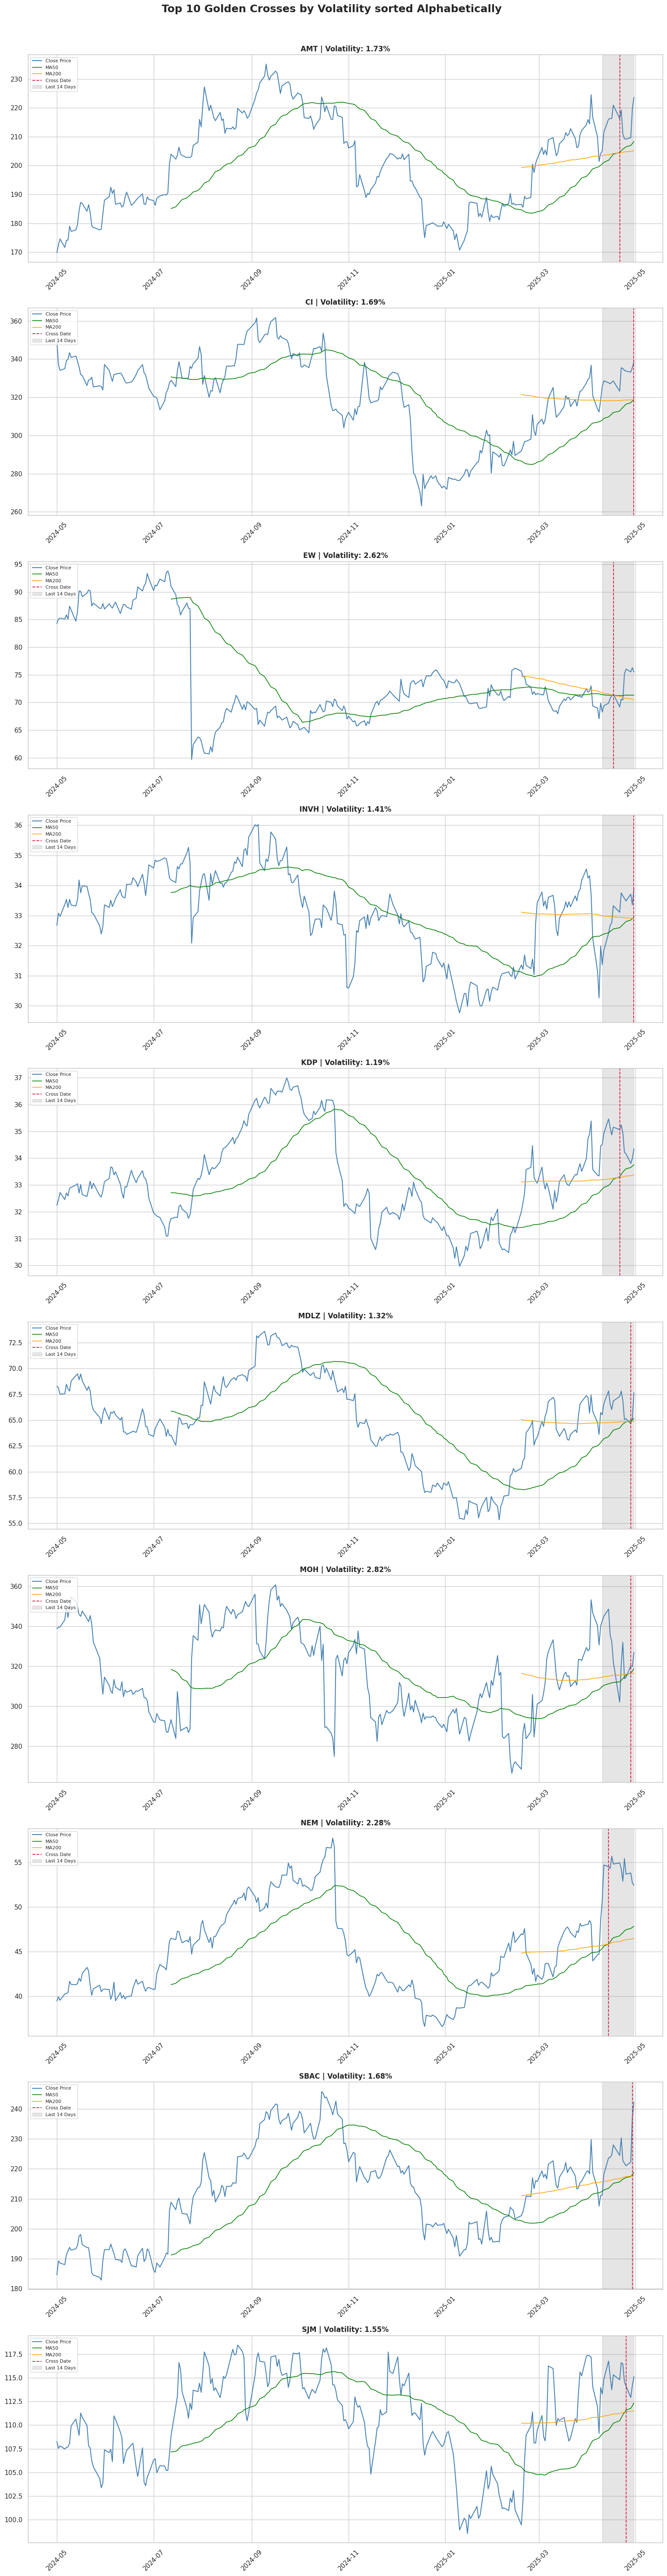

In [ ]:
plot_crosses_grid(df_close, top_golden_by_vol, title_prefix="Golden")

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

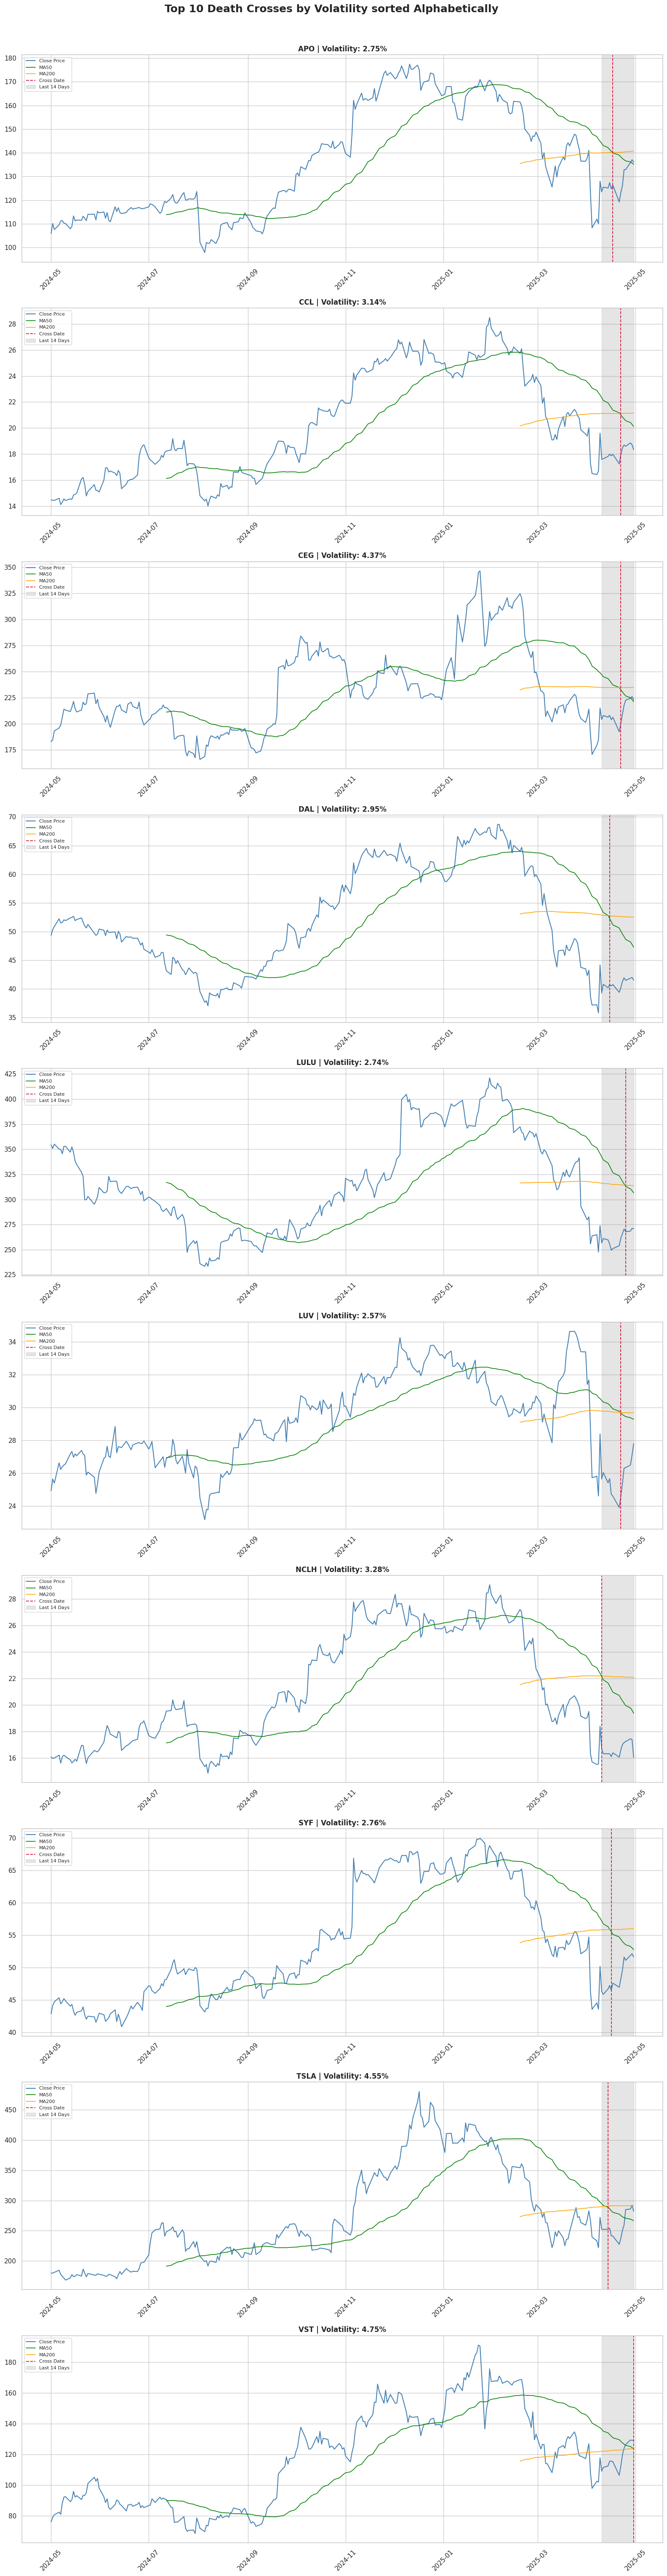

In [ ]:
plot_crosses_grid(df_close, top_death_by_vol, title_prefix="Death")

## Question section

### Understanding concepts

<font color="green">Note: The terms bullish and bearish are frequently used to describe market sentiment and investor expectations. A bullish outlook indicates an expectation that asset prices will rise, often driven by positive fundamentals, strong economic indicators, or investor optimism. A bull market refers to a sustained period of increasing prices across a broad market index. Conversely, a bearish perspective reflects the expectation that asset prices will decline, typically due to weakening economic conditions, deteriorating fundamentals, or negative sentiment. A bear market is characterized by prolonged downward price movements, often accompanied by reduced investor confidence and risk appetite.</font>


#### What is a Golden Cross and what does it typically signal to investors?

<font color="green">A Golden Cross is a bullish technical analysis pattern that occurs when a short-term moving average, typically the 50-day moving average, crosses above a long-term moving average, usually the 200-day moving average. This crossover suggests that upward momentum is building and is often seen by investors as a signal that a strong upward trend may be starting. It can indicate growing investor confidence and the potential for further price increases in a stock or market index.</font>


#### What is a Death Cross and how might market participants react to it?

<font color="green">A Death Cross is a bearish technical analysis pattern that happens when a short-term moving average, usually the 50-day moving average, crosses below a long-term moving average, typically the 200-day moving average. This crossover suggests that downward momentum is increasing and is often viewed by investors as a warning of a potential market downturn or prolonged weakness. Market participants might react by becoming more cautious, reducing their positions, or shifting to safer investments, anticipating further declines in the asset's price.</font>



#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

<font color="green">Moving averages, specifically the 50-day (MA50) and 200-day (MA200), are used in technical analysis to help identify trends and understand market momentum. They work by smoothing out daily price fluctuations, making it easier to see whether the price of a stock is trending up, down, or sideways. The MA50 is often used to reflect shorter-term trends, while the MA200 is considered a benchmark for long-term market direction. When the MA50 crosses above the MA200, it’s known as a Golden Cross and is typically seen as a bullish signal. A Death Cross, where the MA50 drops below the MA200, suggests bearish momentum. These crossovers are widely followed by market participants and can influence trading decisions. Overall, moving averages help investors stay focused on the broader trend and make more disciplined, less reactive decisions.</font>



#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

<font color="green">Using the last 14 days to check for Golden and Death Crosses helps ensure the signals are recent and actionable, while avoiding outdated or lagging data that may no longer reflect current market conditions. This time frame balances the need for timeliness, confirmation, and momentum relevance, making it a practical choice for identifying meaningful trends without reacting to short-term noise.</font>

<font color="green"><u>Implications:</u></font>

<font color="green"> On one hand, it enhances timeliness and actionability by focusing on recent crossover events that are still relevant for making trading or investment decisions. This helps investors stay aligned with current market momentum rather than reacting to outdated signals. On the other hand, it reduces the influence of lagging data, allowing for more responsive analysis that reflects recent price trends and helps avoid delayed reactions in fast-moving markets.</font>

<font color="green">Despite the benefits, this shorter window also comes with trade-offs. It may miss significant crossovers that occurred just outside the 14-day range but still indicate strong ongoing trends. Additionally, it increases the risk of false positives, as short-term market fluctuations can trigger crossovers that do not lead to sustained movements. Overall, the 14-day window is best suited for short- to medium-term strategies, where responsiveness and recent trends are prioritized over long-term confirmation.</font>



#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

<font color="green">Volatility helps put Golden and Death Crosses into context by showing how much a stock’s price typically moves. If volatility is high, a crossover might be less reliable because prices are swinging a lot and the trend could quickly reverse. On the other hand, in a low-volatility environment, a crossover is more likely to signal a stable, lasting trend. So, by looking at volatility alongside crossovers, traders can better judge whether the price movement is meaningful or just part of normal short-term fluctuations.</font>


### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

<font color="green">  I would test the strategy using historical price data. I will look  at past instances where a Golden Cross occurred and then tracking what happened to the stock’s price afterward—over days, weeks, or months. You’d compare the price at the time of the cross to the price after a set holding period to see if there was a gain or loss. By repeating this across many stocks and time periods, I should be able to calculate the average return and see how often trades based on Golden Crosses were profitable. </font>


#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

<font color="green">Relying solely on technical indicators like moving averages without considering fundamentals carries several risks. First, it may lead to misleading signals, since technical patterns reflect past price behavior but not the underlying health or performance of a company. For example, a stock might show a bullish signal like a Golden Cross even if the company is facing serious financial or operational issues. Second, it increases the risk of short-term noise influencing decisions, especially during volatile or news-driven markets where price movements may not reflect long-term value. </font>

<font color="green">Lastly, ignoring fundamentals means missing out on important context like earnings, cash flow, competitive position, or macroeconomic trends—all of which are critical for evaluating sustainability and risk. There are multiple examples of company stocks strong technical indicators, including bullish patterns like upward-trending moving averages or even a Golden Cross, despite having poor or fraudulent fundamentals. </font>

<font color="green">A couple of examples worth mention:</font>

<font color="green">Enron : Enron's stock showed strong technical signals like bullish moving averages, but hidden accounting fraud and poor fundamentals led to a sudden collapse, showing how technical analysis alone failed to reveal the underlying risks.</font>

<font color="green">The Dot-Com bubble: Many internet stocks showed strong technical signals like Golden Crosses and rising volumes, but weak fundamentals, unrealistic valuations and even no profits (WebVan, Pet.com)  led to massive losses when the bubble burst.</font>




#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

<font color="green">To reduce false signals I would improve the strategy by combining it with additional confirmation tools. For example, checking for above-average trading volume during the crossover helps verify that there's real investor interest behind the move. You can also use momentum indicators like RSI or MACD to confirm upward strength, or apply a volatility filter to avoid signals triggered by short-term price noise in highly unstable markets.</font>

<font color="green">Another effective improvement is to wait for price confirmation, such as a day or two of continued upward movement or a successful retest of the crossover level; before entering a trade. Additionally, layering in basic fundamental checks like  earnings or revenue growth; would  help me ensure I am not in the presence of on a bullish chart from a fundamentally weak company. </font>

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

<font color="green">Whether news sentiment around future projects can help validate technical signals like Golden Crosses depends on how quickly the market reacts to information. In most cases, especially for well-known companies, sentiment is already reflected in the stock price by the time it's reported or widely discussed.</green>

<font color="green">Since moving averages and technical signals are based on price trends, they often already capture investor reactions to news. This means sentiment may not provide much additional insight—it’s likely baked into the price movement that created the signal in the first place. So while news can offer useful context, it's not always a reliable or separate confirmation of a technical signal.</green>


### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

<font color="green">From a trading perspective, a strategy based solely on Golden or Death Crosses is not fully actionable on its own. While these crossovers can indicate potential trend shifts, they are lagging indicators—they react to price movements that have already happened. This means by the time a signal appears, a significant portion of the move may already be priced in, reducing profit potential.</font>

<font color="green">To make the strategy more actionable, I would combine it with confirming indicators like volume, momentum (e.g., RSI or MACD), or even simple price confirmation (e.g., a breakout after the cross) as well with the company financial indicator and fundamentals. Without these, the strategy risks generating false or late signals, especially in volatile or sideways markets. In summary, Golden/Death Crosses are a useful signal, but they work best as part of a broader trading system—not as a standalone strategy.</font>

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?

<font color="green">Golden Crosses do not consistently predict upward movement, especially when followed by high volatility For example: KDP and NEM (Charts 3 and 8 from the Top 10 Golden Crosses by Volatity ) . While they can signal bullish momentum in trending markets, they are lagging indicators and often reflect past price strength rather than future direction. In volatile or sideways conditions, Golden Crosses may produce false signals, with prices reversing shortly after the crossover.</font>



#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:
<ul>
<font color="green">* Golden and Death Crosses can be useful indicators of trend shifts but are lagging by nature and work best in trending markets.</font>

<font color="green">* Their predictive power improves when combined with other signals such as volume, momentum (e.g., RSI, MACD), and basic fundamental strength.</font>
</ul>
Caveats in 2 or 3 bullet points:
<ul>
<font color="green">* Crossovers alone are not consistently reliable, especially in volatile or sideways markets where false signals are more likely.</font>

<font color="green">* Market sentiment and fundamentals matter—strong technical signals may fail if not supported by solid earnings, macro trends, or competitive positioning.</font>

<font color="green">* Backtesting results and strategy performance may vary by sector, time horizon, and market conditions, so the strategy should be adapted and validated within a broader portfolio context.</font>
</ul>